# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   [Loan Classification](https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset/data)

2. **Tujuan Dataset**:

    Dataset bertujuan untuk membangun model klasifikasi yang mampu memprediksi apakah pengajuan pinjamna seseorang individu akan disetujui *(approve)* atau ditolak *(denied)* berdasarkan profil demografi dan kondisi finansial mereka.

3. **Struktur Dataset**

    Dataset terdiri dari fitur-fitur numerik dan kategorikal, dengan keterangan sebagai berikut.
    * Target Variable **(loan_status)**: variabel biner yang menjadi fokus prediksi (0: *Approved*, 1: *Denied*)
    * Fitur Keuangan: Meliputi **age** (usia), **gender** (jenis kelamin), **education_level** (tingkat pendidikan), **occupation** jenis pekerjaan), dan **marital_status** (status pernikahan)
    * Fitur Tambahan (Hasil Binning): **age_group** dan **income_group**  



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import os
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from google.colab import drive

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
url = "https://drive.google.com/uc?id=1DIoxi-L-9-anoaViAI8N1eGSnQlP8GsW"
df = pd.read_csv(url)

print("Dataset berhasil dimuat.")


Dataset berhasil dimuat.


In [3]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


Dataset berisi **61 baris** (indeks 0 hingga 60) dan **8 kolom**.

Tidak ada data yang kosong **(missing values)** dalam dataset.

In [5]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


* **Usia (Age):**

  * Rata-rata nasabah berusia sekitar 37 tahun.

  * Rentang usia berkisar dari yang termuda 24 tahun hingga yang tertua 55 tahun.

  * Sebanyak 50% nasabah berada di bawah usia 36 tahun (median).

* **Pendapatan (Income):**

  * Rata-rata pendapatan nasabah adalah sekitar $78.983 per tahun.

  * Terdapat kesenjangan yang cukup besar antara pendapatan terendah ($25.000) dan tertinggi ($180.000).

  * Nilai standar deviasi yang tinggi ($33.772) menunjukkan bahwa variasi pendapatan antar nasabah cukup besar.

* **Skor Kredit (Credit Score):**

  * Rata-rata skor kredit nasabah berada di angka 709, yang umumnya dianggap sebagai kategori kredit yang baik.

  * Skor terendah adalah 560 dan yang tertinggi mencapai 830.

  * Mayoritas nasabah (75%) memiliki skor kredit di atas 650.

In [6]:
df.describe(include='object')

,gender,occupation,education_level,marital_status,loan_status
count,61,61,61,61,61
unique,2,38,5,2,2
top,Male,Engineer,Bachelor's,Married,Approved
freq,31,5,23,37,45


* **Usia (Age):** Rata-rata nasabah berusia 37 tahun. Nasabah termuda berusia 24 tahun dan tertua 55 tahun.

* **Pendapatan (Income):** Rata-rata pendapatan tahunan adalah $78.983.

* **Skor Kredit (Credit Score):** Rata-rata skor kredit adalah 709. Nilai tengah (median) berada di angka 720, menunjukkan mayoritas nasabah memiliki reputasi kredit yang cukup baik.

* **Dominasi Gender & Status:** Mayoritas nasabah adalah Laki-laki (Male) sebanyak 31 orang dan sudah Menikah (Married) sebanyak 37 orang.

* **Pekerjaan & Pendidikan:** Terdapat variasi pekerjaan yang sangat tinggi (38 jenis pekerjaan unik), dengan Engineer sebagai profesi yang paling sering muncul. Tingkat pendidikan terbanyak adalah lulusan Bachelor's (Sarjana).

* **Status Pinjaman (Loan Status):** Sebagian besar nasabah dalam dataset ini memiliki status pinjaman Approved (Disetujui), yaitu sebanyak 45 dari 61 orang.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

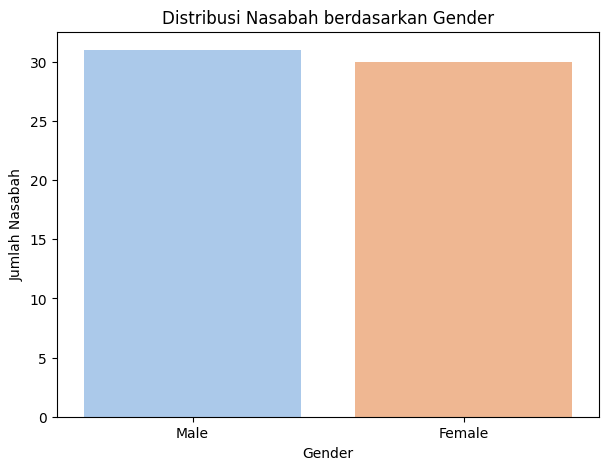

In [7]:
# visualisasi distribusi nasabah berdasarkan gender

plt.figure(figsize=(7, 5))
sns.countplot(x='gender', data=df, hue = 'gender', palette='pastel', legend=False)
plt.title('Distribusi Nasabah berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Nasabah')
plt.show()

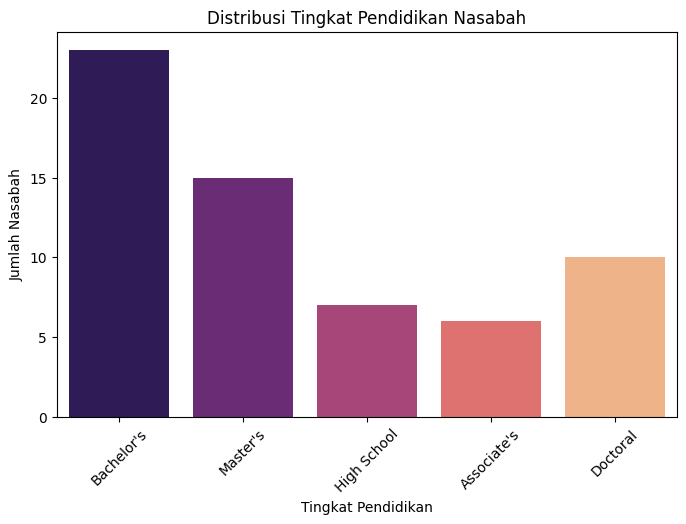

In [8]:
# visualisasi distribusi tingkat pendidikan nasabah

plt.figure(figsize=(8, 5))
sns.countplot(x='education_level', data=df, hue='education_level', palette='magma', legend=False)
plt.title('Distribusi Tingkat Pendidikan Nasabah')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.show()

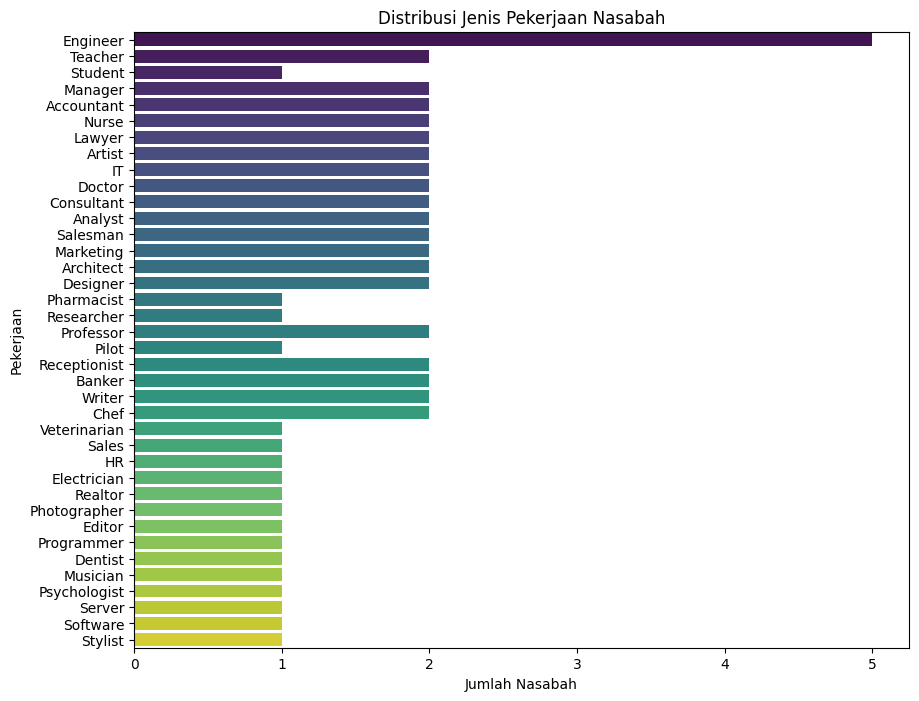

In [9]:
# visualisasi distribusi jenis pekerjaan nasabah

plt.figure(figsize=(10, 8))

sns.countplot(y='occupation', data=df, hue='occupation', palette='viridis', legend=False)
plt.title('Distribusi Jenis Pekerjaan Nasabah')
plt.xlabel('Jumlah Nasabah')
plt.ylabel('Pekerjaan')
plt.show()

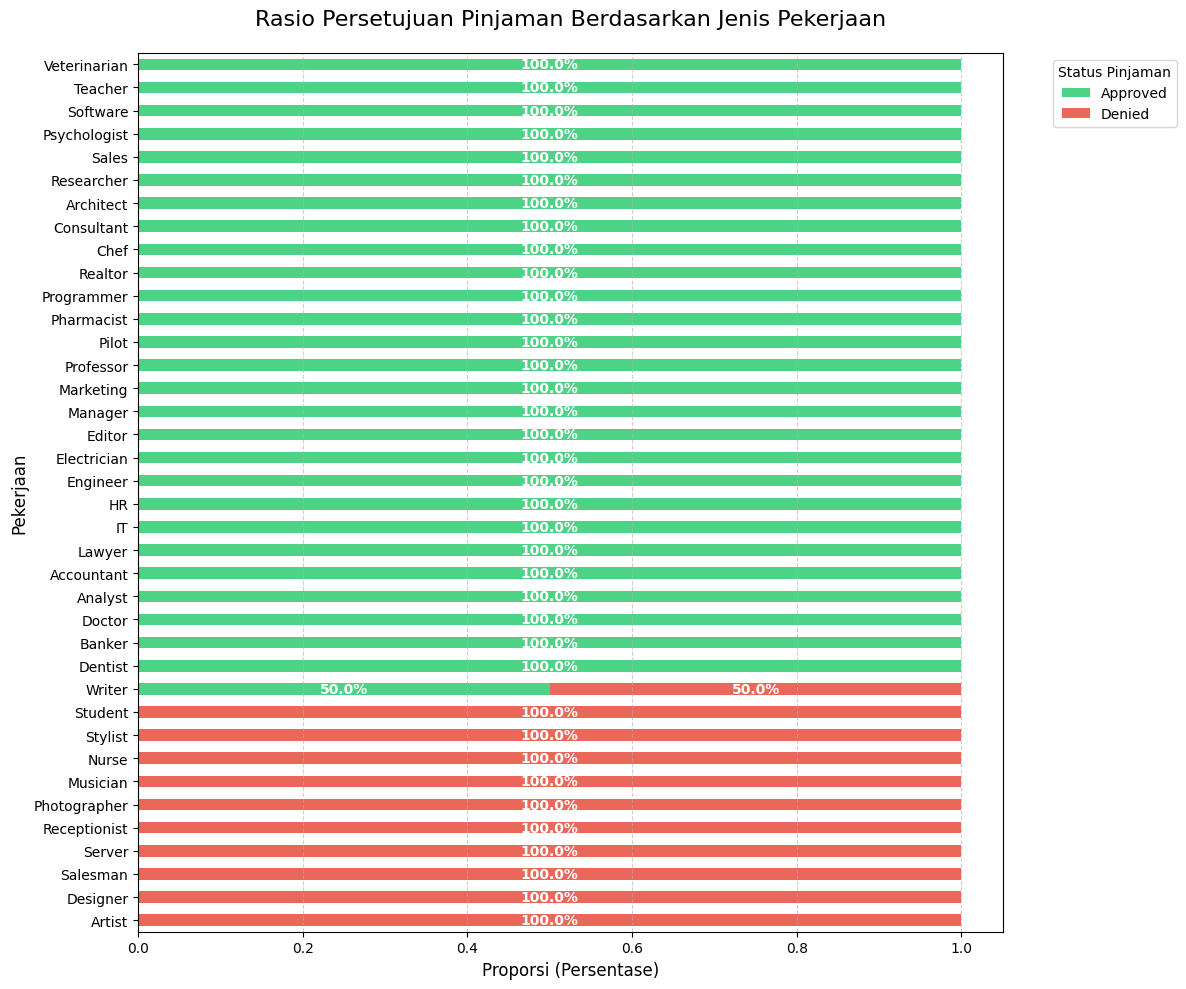

In [10]:
# visualisasi distribusi persetujuan pinjaman berdasarkan jensi pekerjaan

occ_loan_pct = pd.crosstab(df['occupation'], df['loan_status'], normalize='index')

occ_loan_pct = occ_loan_pct.sort_values(by='Approved', ascending=True)

ax = occ_loan_pct.plot(kind='barh',
                       stacked=True,
                       figsize=(12, 10),
                       color=[ '#2ecc71', '#e74c3c'], # Merah untuk Denied, Hijau untuk Approved
                       alpha=0.85)

for p in ax.patches:
    width = p.get_width()
    if width > 0.05:
        ax.annotate(f'{width*100:.1f}%',
                    (p.get_x() + width/2, p.get_y() + p.get_height()/2),
                    ha='center', va='center',
                    color='white', fontweight='bold')

plt.title('Rasio Persetujuan Pinjaman Berdasarkan Jenis Pekerjaan', fontsize=16, pad=20)
plt.xlabel('Proporsi (Persentase)', fontsize=12)
plt.ylabel('Pekerjaan', fontsize=12)
plt.legend(title='Status Pinjaman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

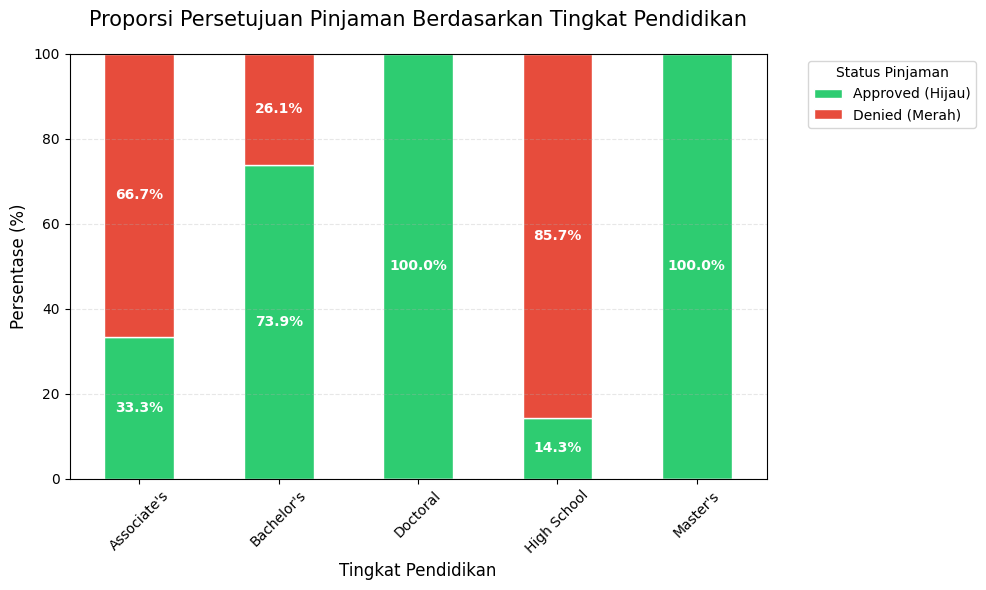

In [11]:
# visualisasi proporsi persetujuan pinjaman berdasarkan tingkat pendidikan

edu_loan_pct = pd.crosstab(df['education_level'], df['loan_status'], normalize='index')

colors = ['#2ecc71', '#e74c3c']

ax = (edu_loan_pct * 100).plot(kind='bar',
                               stacked=True,
                               figsize=(10, 6),
                               color=colors,
                               edgecolor='white')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()

    if height > 1:
        ax.annotate(f'{height:.1f}%',
                    (x + width/2, y + height/2),
                    ha='center', va='center',
                    color='white', fontweight='bold', fontsize=10)

plt.title('Proporsi Persetujuan Pinjaman Berdasarkan Tingkat Pendidikan', fontsize=15, pad=20)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xlabel('Tingkat Pendidikan', fontsize=12)

plt.legend(title='Status Pinjaman',
           labels=['Approved (Hijau)', 'Denied (Merah)'],
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

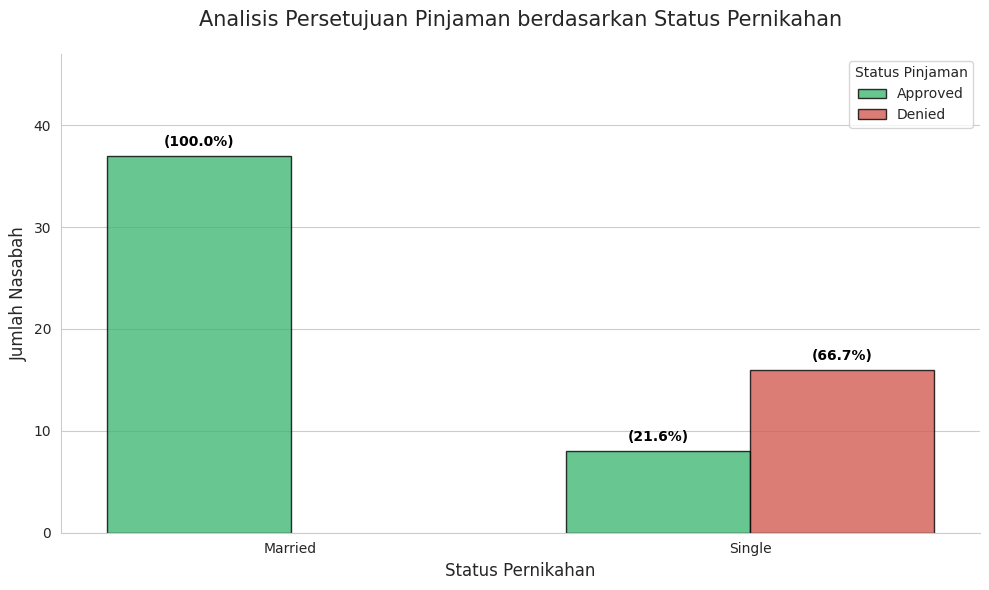

In [12]:
# visualisasi persetujuan pinjaman berdasarkan status pernikahan

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.countplot(x='marital_status', data=df, hue='loan_status',
                   palette=['#2ecc71', '#e74c3c'], edgecolor='black', alpha=0.8)

total_per_category = df.groupby('marital_status')['loan_status'].count()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        category_idx = int(p.get_x() + p.get_width()/2)
        category_name = ax.get_xticklabels()[category_idx].get_text()
        total = total_per_category[category_name]
        percentage = (height / total) * 100

        ax.annotate(f'({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=10, color='black', fontweight='bold',
                    xytext=(0, 10),
                    textcoords='offset points')

plt.title('Analisis Persetujuan Pinjaman berdasarkan Status Pernikahan', fontsize=15, pad=20)
plt.xlabel('Status Pernikahan', fontsize=12)
plt.ylabel('Jumlah Nasabah', fontsize=12)
plt.ylim(0, df['marital_status'].value_counts().max() + 10)

sns.despine()

plt.legend(title='Status Pinjaman', loc='upper right')
plt.tight_layout()
plt.show()

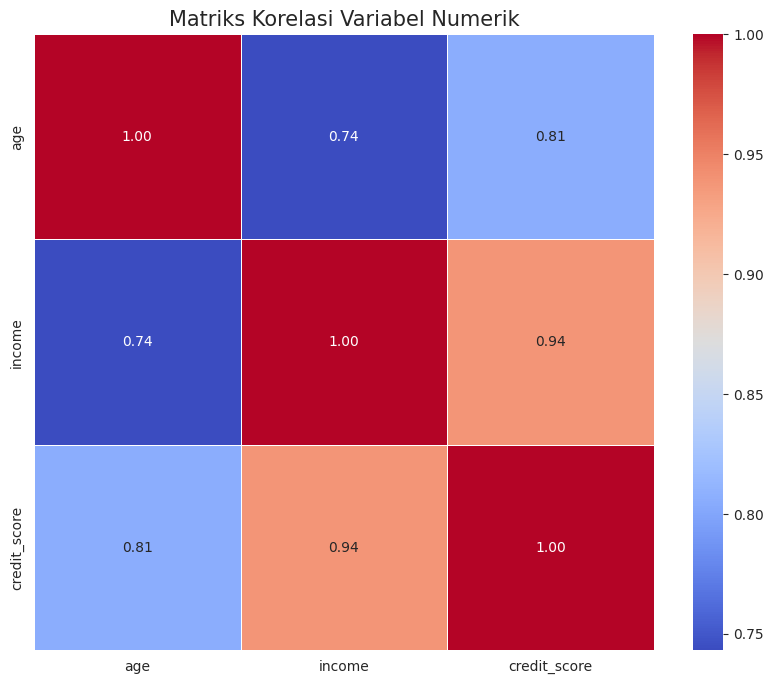

In [13]:
# matriks korelasi variabel numerik
correlation_matrix = df[['age', 'income', 'credit_score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriks Korelasi Variabel Numerik', fontsize=15)
plt.show()

* **Income & Credit Score (0.94):** Ini adalah korelasi terkuat dalam dataset. Artinya, nasabah dengan pendapatan lebih tinggi hampir selalu memiliki skor kredit yang lebih tinggi. Ini menunjukkan bahwa kapasitas finansial berbanding lurus dengan reputasi kredit di mata lembaga keuangan.

* **Age & Credit Score (0.81):** Terdapat korelasi kuat yang menunjukkan bahwa seiring bertambahnya usia, skor kredit nasabah cenderung meningkat. Ini bisa mengindikasikan kemapanan finansial dan riwayat kredit yang lebih panjang pada nasabah yang lebih tua.

* **Age & Income (0.74):** Terdapat hubungan positif di mana usia yang lebih matang biasanya dibarengi dengan pendapatan yang lebih besar, meskipun korelasinya tidak sekuat hubungan pendapatan dengan skor kredit.

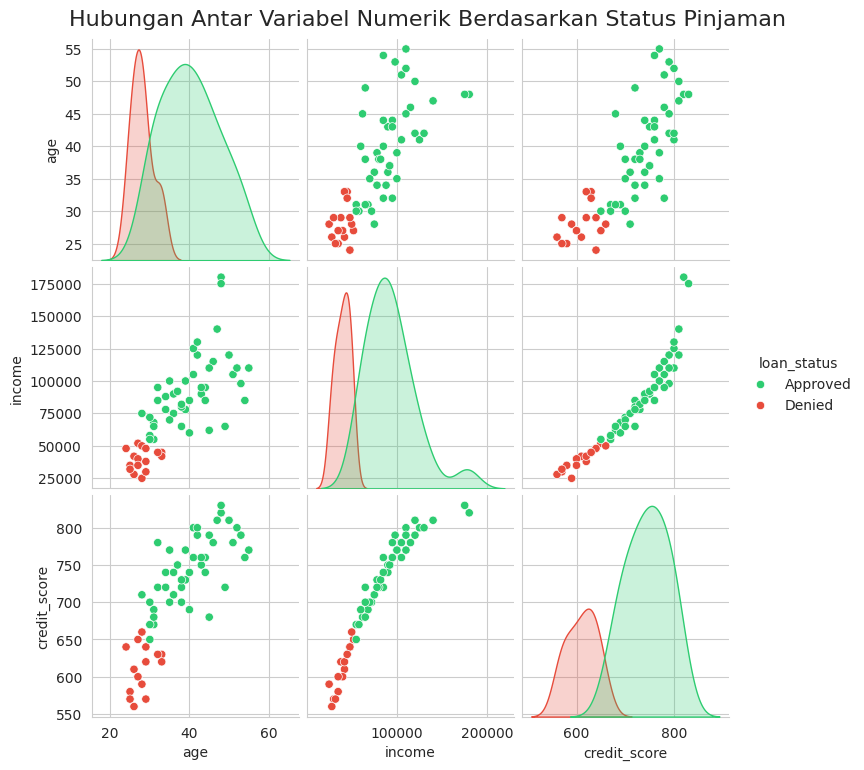

In [14]:
# membuat Pairplot untuk melihat sebaran variabel berdasarkan status pinjaman
sns.pairplot(df[['age', 'income', 'credit_score', 'loan_status']],
             hue='loan_status',
             palette=['#2ecc71', '#e74c3c'],
             diag_kind='kde')

plt.suptitle('Hubungan Antar Variabel Numerik Berdasarkan Status Pinjaman', y=1.02, fontsize=16)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
df.isnull().sum()

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
# binning usia

age_bins = [0, 30, 50, 100]
age_labels = ['Young', 'Middle', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

counts = df['age_group'].value_counts()
print(counts)

age_group
Middle    39
Young     17
Senior     5
Name: count, dtype: int64


In [18]:
# binning pendapatan
income_bins = [0, 40000, 80000, df['income'].max()]
income_labels = ['Low', 'Medium', 'High']
df['income_group'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

counts = df['income_group'].value_counts()
print(counts)

income_group
High      29
Medium    24
Low        8
Name: count, dtype: int64


In [19]:

# encoding
le = LabelEncoder()

cat_cols = ['gender', 'occupation', 'marital_status', 'age_group', 'income_group']

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

edu_mapping = {'High School': 1, "Associate's": 2, "Bachelor's": 3, "Master's": 4, 'Doctoral': 5}
df['education_level'] = df['education_level'].map(edu_mapping)

df['loan_status'] = le.fit_transform(df['loan_status'])

In [20]:
X = df.drop('loan_status', axis=1)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [21]:
# standardization

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
df_cleaned = pd.DataFrame(X_train_scaled)
df_cleaned.to_csv('loan_data_preprocessing.csv', index=False)

print("loan_data_preprocessing.csv berhasil dibuat.")

loan_data_preprocessing.csv berhasil dibuat.
